# Week2授業課題2 富士下山問題

## 【問題1】データの可視化

In [6]:
import numpy as np

csv_path = "/Users/toyodasatomi/Downloads/mtfuji_data.csv"

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji)
print(fuji.shape)

[[    0.          35.134141   139.132082     0.           0.      ]
 [    1.          35.135826   139.129202     0.         322.      ]
 [    2.          35.13751    139.126322     0.         644.      ]
 ...
 [  297.          35.631284   138.271368  1973.99     95698.      ]
 [  298.          35.632947   138.268452  1841.36     96020.      ]
 [  299.          35.63461    138.265536  1725.8      96343.      ]]
(300, 5)


In [7]:
import matplotlib.pyplot as plt

plt.title("Mt.fuji")
plt.xlabel('now')
plt.ylabel('hyokou')

plt.plot(fuji[:, 0], fuji[:, 3])
plt.show()

<Figure size 640x480 with 1 Axes>

## 【問題2】ある地点の勾配を計算する関数を作成

左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」  
「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。
勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [8]:
x = fuji[1:]- fuji[:-1]
print(x)

[[   1.          0.001685   -0.00288     0.        322.      ]
 [   1.          0.001684   -0.00288     0.        322.      ]
 [   1.          0.001684   -0.002881    0.        322.      ]
 ...
 [   1.          0.001664   -0.002916   29.36      322.      ]
 [   1.          0.001663   -0.002916 -132.63      322.      ]
 [   1.          0.001663   -0.002916 -115.56      323.      ]]


In [9]:
#print(x[:,0])
now = x[:,0]
print(now)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
#print(x[:,3])
hyokou = x[:,3]
print (hyokou)

[   0.      0.      0.      0.      0.      6.62    0.59    4.99   42.21
  117.15    6.28   50.37   47.17  158.38  -62.02    8.32  123.34  -18.01
   -7.57  102.68   30.42   44.04  -26.74   -1.58  -54.09  151.4   -22.01
  177.53   96.7   -57.01 -102.16  -73.94   27.86   93.14  -37.54  -78.13
    7.72  -31.61    0.      0.      0.      0.      0.      0.      0.
    0.      0.    127.68   -0.82  -20.36   49.44   74.7  -105.62  -17.92
  -41.59  -51.04  109.86 -110.53   -1.82  -64.24 -108.22  -11.79  -54.82
   60.87  -55.26  -40.69    7.33  -40.17   24.72  -41.94  -49.98   -6.61
   13.23    2.13    0.15    6.43    9.02    3.5    28.27    2.19   22.4
   15.66   13.16   16.58   16.7    14.44   17.     17.1    21.43   13.92
   13.37   10.68   18.67   28.72   11.93   27.79   25.57   15.45   12.51
   18.9    22.67   22.37   41.     25.27   26.61   22.24   40.58   26.92
   34.1    25.35   46.11   60.78   53.28   20.11   52.55   67.58   69.65
   76.91   55.28   36.42   61.07   67.07   55.48   68.

In [11]:
koubai = hyokou/now
print(koubai)

[   0.      0.      0.      0.      0.      6.62    0.59    4.99   42.21
  117.15    6.28   50.37   47.17  158.38  -62.02    8.32  123.34  -18.01
   -7.57  102.68   30.42   44.04  -26.74   -1.58  -54.09  151.4   -22.01
  177.53   96.7   -57.01 -102.16  -73.94   27.86   93.14  -37.54  -78.13
    7.72  -31.61    0.      0.      0.      0.      0.      0.      0.
    0.      0.    127.68   -0.82  -20.36   49.44   74.7  -105.62  -17.92
  -41.59  -51.04  109.86 -110.53   -1.82  -64.24 -108.22  -11.79  -54.82
   60.87  -55.26  -40.69    7.33  -40.17   24.72  -41.94  -49.98   -6.61
   13.23    2.13    0.15    6.43    9.02    3.5    28.27    2.19   22.4
   15.66   13.16   16.58   16.7    14.44   17.     17.1    21.43   13.92
   13.37   10.68   18.67   28.72   11.93   27.79   25.57   15.45   12.51
   18.9    22.67   22.37   41.     25.27   26.61   22.24   40.58   26.92
   34.1    25.35   46.11   60.78   53.28   20.11   52.55   67.58   69.65
   76.91   55.28   36.42   61.07   67.07   55.48   68.

In [12]:
#各地点の勾配の数値をリスト化する関数
def conpute_koubai(x=0,y=3):
    s = fuji[1:]- fuji[:-1]
    now = s[:,x] #xの変化量
    hyokou = s[:,y]
    koubai = hyokou/now
    return koubai
#koubai = conpute_koubai(x,y)

In [13]:
conpute_koubai(0,3)

array([   0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    6.62,    0.59,
          4.99,   42.21,  117.15,    6.28,   50.37,   47.17,  158.38,
        -62.02,    8.32,  123.34,  -18.01,   -7.57,  102.68,   30.42,
         44.04,  -26.74,   -1.58,  -54.09,  151.4 ,  -22.01,  177.53,
         96.7 ,  -57.01, -102.16,  -73.94,   27.86,   93.14,  -37.54,
        -78.13,    7.72,  -31.61,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,  127.68,   -0.82,
        -20.36,   49.44,   74.7 , -105.62,  -17.92,  -41.59,  -51.04,
        109.86, -110.53,   -1.82,  -64.24, -108.22,  -11.79,  -54.82,
         60.87,  -55.26,  -40.69,    7.33,  -40.17,   24.72,  -41.94,
        -49.98,   -6.61,   13.23,    2.13,    0.15,    6.43,    9.02,
          3.5 ,   28.27,    2.19,   22.4 ,   15.66,   13.16,   16.58,
         16.7 ,   14.44,   17.  ,   17.1 ,   21.43,   13.92,   13.37,
         10.68,   18.67,   28.72,   11.93,   27.79,   25.57,   15.45,
         12.51,   18

In [14]:
#特定の場所から勾配を求める関数
def conpute_koubai_n (x=0,y=3,n=136):
    a = fuji[1:]- fuji[:-1]
    now = a[:,x]
    hyokou = a[:,y]
    koubai = hyokou/now
    koubai_n = koubai[n]
    return koubai_n

In [15]:
conpute_koubai_n()

165.48999999999978

## 【問題3】移動先の地点を計算する関数を作成

In [16]:
def jiten(ban):
    
    number = conpute_koubai()
    result = ban - 0.2 * number[ban]
    
    return round(result)
    
jiten(10)

9.0

In [17]:
jiten(298)

321.0

## ------------修正①ここから-----------------
<修正文の指摘>  
問題3
ありえない値を偶然とっていませんが、配列の外のインデックスを指定してしまう場合がありえます。範囲を限定するなどして、これを直してください  
→引数の指定？次の地点のインデックス？どちらも？

In [55]:
def jiten_s(ban):

    if ban < 299 and ban >= 0:
        number = conpute_koubai()
        result = ban - 0.2 * number[ban]
        result = round(result)
    else:
        print("引数がインデックスの範囲外です")
        return None

    if result < 299 and result >= 0:
        return int(result)
    else:
        print("次の時点がインデックスの範囲外です")
        return None

In [56]:
#メモ
#       if result < 299:
#  or (result < 299 and result >= 0)
#           print("次の時点がインデックスの範囲外です")
#          return None
# 　次の時点がインデックス範囲外の動いてしまう・・・

In [59]:
jiten_s(300)

引数がインデックスの範囲外です


In [142]:
jiten_s(298)

次の時点がインデックスの範囲外です


## ------------- 修正①ここまで------------- 

## 【問題4】山を下る関数を作成

In [65]:
def gezan(a=136):
    
    gezan_list = [a]
    number = conpute_koubai()
    v = fuji[a:,3]
    result_a = a
    
    while True:
        result_b = result_a - 0.2 * number[result_a]
        result = round(result_b)
        result_a = int(result)
        
        gezan_list.append(result_a)
        v = fuji[result_a,3]
        
        b = result_a - 0.2 * number[result_a]
        b_1 = round(b)
        b_2 = int(b_1)
        
        if  b_2 in gezan_list:
            break
            
    return gezan_list  

    gezan_list  = gezan(a)
    #print(fuji)
    #print(v)

In [74]:
gezan()

[136, 103, 98, 95, 89, 86, 83, 80, 76, 74]

In [67]:
gezan_list  = gezan(136)
print(gezan_list)

[136, 103, 98, 95, 89, 86, 83, 80, 76, 74]


## ------------- 修正②ここから------------- 

問題4  
    問題３の関数を使って更新するようにしてください。

In [89]:
def gezan_s(a=136):
    
    gezan_list = [a]
    result_a = a
    
    while True:
        result_a=jiten_s(result_a)    
        gezan_list.append(result_a)
        b_2=jiten_s(result_a)
        
        if  b_2 in gezan_list:
            break
            
    return gezan_list  

    gezan_list  = gezan(a)

In [96]:
gezan_s()

[136, 103, 98, 95, 89, 86, 83, 80, 76, 74]

## ------------- 修正②ここまで-------------

## 【問題5】下山過程の可視化

In [97]:
#fujiのデータから特定の列：デフォルトは標高(y=3)の特定の位置(n)のデータを抽出する関数
def conpute_some_n_fuji (y=3,n=[gezan_list]):
    some_data_list= []
    for i in range(len(n)):
        m = n[i]
        some_data_list.append(fuji[m,y])
    return some_data_list

In [98]:
conpute_some_n_fuji(3,[gezan_list])
some_data_list = conpute_some_n_fuji(3,[gezan_list])
print(some_data_list)

[array([3434.59,  858.62,  741.17,  672.36,  575.07,  519.54,  471.82,
        420.6 ,  377.62,  371.04])]


In [63]:
print(gezan_list)

[136, 103, 98, 95, 89, 86, 83, 80, 76, 74]


In [67]:
print(some_data_list) #このリストに「array」つくのか謎」
print(type(some_data_list)) 

[array([3434.59,  858.62,  741.17,  672.36,  575.07,  519.54,  471.82,
        420.6 ,  377.62,  371.04])]
<class 'list'>


## ------------- 修正③ここから-------------

問題5
gezan関数で帰ってきている値は一次元のリストなので、conpute_some_n_fujiのnに渡すときn=[gezan_lisit]という風にすると、１×len(gezan_list)の二次元行列になってしまいます。
このため、ところどころ出力がおかしくなっています。

In [120]:
def conpute_some_n_fuji_s (y=3,n=gezan_list): #[gezan_list]→gezan_listに修正
    some_data_list= []
    for i in range(len(n)):
        m = n[i]
        some_data_list.append(fuji[m,y])
    return some_data_list

In [121]:
some_data_list = conpute_some_n_fuji_s()
print(some_data_list)

[3434.59, 858.62, 741.17, 672.36, 575.07, 519.54, 471.82, 420.6, 377.62, 371.04]


In [115]:
import numpy as np

x = np.array(gezan_list)
y = np.array(some_data_list)

print(x)
print(y)
print(some_data_list)
print(x.shape)
print(y.shape) # なおった
print(y.T.shape)

[136 103  98  95  89  86  83  80  76  74]
[3434.59  858.62  741.17  672.36  575.07  519.54  471.82  420.6   377.62
  371.04]
[3434.59, 858.62, 741.17, 672.36, 575.07, 519.54, 471.82, 420.6, 377.62, 371.04]
(10,)
(10,)
(10,)


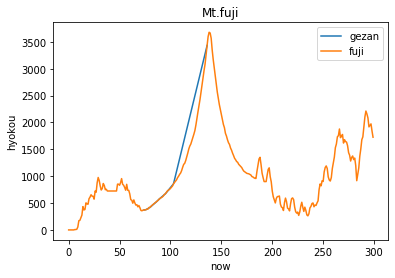

In [117]:
# 富士山の標高と136の時点からハイパーパラメータ「0.2」で下山した時の標高を比較
plt.title("Mt.fuji")
plt.xlabel('now')
plt.ylabel('hyokou')

plt.plot(x,y,label="gezan")
#シンプルにデータ取得をx,yに修正
plt.plot(fuji[:, 0], fuji[:, 3],label="fuji")
plt.legend()
#plt.plot(x[:],y[:],label="gezan")

plt.show()

## ------------- 修正③ここまで-------------

## 【問題6】初期値の変更

In [123]:
#今いる時点を136から142に変更
gezan_list_142  = gezan_s(142)
print(gezan_list_142)
some_data_list_142 = conpute_some_n_fuji_s(3,gezan_list_142)
print(some_data_list_142)

[142, 172, 175, 176, 177, 179, 185, 163, 168]
[3171.53, 1095.73, 1053.28, 1049.33, 1043.91, 1022.1, 1094.28, 1333.51, 1201.31]


In [125]:
x_142 = np.array(gezan_list_142)
y_142 = np.array(some_data_list_142)
print(x_142)
print(y_142)

[142 172 175 176 177 179 185 163 168]
[3171.53 1095.73 1053.28 1049.33 1043.91 1022.1  1094.28 1333.51 1201.31]


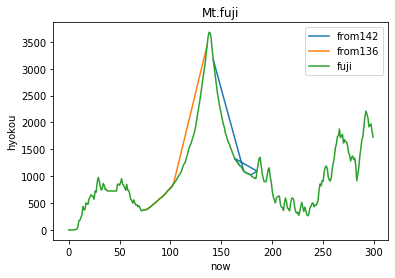

In [127]:
# 富士山の標高と136と142の時点からハイパーパラメータ「0.2」で下山した時の標高を比較
plt.title("Mt.fuji")
plt.xlabel('now')
plt.ylabel('hyokou')

plt.plot(x_142,y_142,label="from142")
plt.plot(x,y,label="from136")
plt.plot(fuji[:, 0], fuji[:, 3],label="fuji")
plt.legend()

plt.show()

## 【問題7】（アドバンス問題）ハイパーパラメータの変更

In [129]:
# ハイパーパラメータも引数に加えられる関数に変更
def gezan_hyper(a=136,hyper=0.2):
    
    gezan_list = [a]
    number = conpute_koubai()
    v = fuji[a:,3]
    result_a = a
    
    while True:
        result_b = result_a - hyper * number[result_a]
        result = round(result_b)
        result_a = int(result)
        
        gezan_list.append(result_a)
        v = fuji[result_a,3]
        
        b = result_a - hyper * number[result_a]
        b_1 = round(b)
        b_2 = int(b_1)
        
        if  b_2 in gezan_list:
            break
            
    return gezan_list  

In [130]:
gezan_hyper(136,0.1)

[136,
 119,
 115,
 108,
 105,
 103,
 100,
 98,
 97,
 95,
 92,
 90,
 89,
 88,
 86,
 84,
 82,
 81,
 79]

In [138]:
# 136の時点からhyperパラメータを0.1に変更
gezan_list_136_01  = gezan_hyper(136,0.1)
some_data_list_136_01 = conpute_some_n_fuji_s(3,gezan_list_136_01)

x_136_01 = np.array(gezan_list_136_01)
y_136_01 = np.array(some_data_list_136_01)

In [137]:
# 136の時点からhyperパラメータを0.3に変更
gezan_list_136_03  = gezan_hyper(136,0.3)
some_data_list_136_03 = conpute_some_n_fuji_s(3,gezan_list_136_03)

x_136_03 = np.array(gezan_list_136_03)
y_136_03 = np.array(some_data_list_136_03)

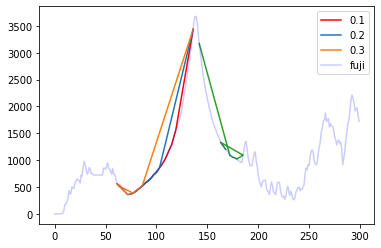

In [141]:
# ハイパーパラメータ「0.1,0.2,0.3で変化を比較」
plt.plot(x_136_01,y_136_01,label="0.1",color="r")
plt.plot(x,y,label="0.2")
plt.plot(x_136_03,y_136_03,label="0.3")
plt.plot(x_142,y_142)
plt.plot(fuji[:, 0], fuji[:, 3],label="fuji",color="b",alpha=0.2)
plt.legend()
plt.show()

In [ ]:
##